# **Project Name - Bike sharing**

### **Project Type - Exploratory Data Analysis (EDA) and Regression**

# About the Dataset 

Bike sharing systems are new generation of traditional bike rentals where whole process from membership, rental and return 
back has become automatic. Through these systems, user is able to easily rent a bike from a particular position and return 
back at another position. Currently, there are about over 500 bike-sharing programs around the world which is composed of 
over 500 thousands bicycles. Today, there exists great interest in these systems due to their important role in traffic, 
environmental and health issues. 

Apart from interesting real world applications of bike sharing systems, the characteristics of data being generated by
these systems make them attractive for the research. Opposed to other transport services such as bus or subway, the duration
of travel, departure and arrival position is explicitly recorded in these systems. This feature turns bike sharing system into
a virtual sensor network that can be used for sensing mobility in the city. Hence, it is expected that most of important
events in the city could be detected via monitoring these data.


### Features:

**UNDERSTAND THE GIVEN VARIABLES**

**instant  :-** Record index

**dteday :-** Date.

**season :-** season (1:winter, 2:spring, 3:summer, 4:fall).

**yr :-** year (0: 2011, 1:2012).

**mnth :-** month ( 1 to 12).

**hr :-** hour (0 to 23).

**holiday: :-** weather day is holiday or not (extracted from [Web Link]).

**weekday :-** day of the week.

**workingday :-** if day is neither weekend nor holiday is 1, otherwise is 0.

**weathersit :-** 

**1 :-** Clear, Few clouds, Partly cloudy, Partly cloudy

**2 :-** Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist.

**3 :-** Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds

**4 :-** Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog

**temp :-** Normalized temperature in Celsius. The values are derived via (t-t_min)/(t_max-t_min), t_min=-8, t_max=+39 (only in hourly scale

**atemp :-** Normalized feeling temperature in Celsius. The values are derived via (t-t_min)/(t_max-t_min), t_min=-16, t_max=+50 (only in hourly scale)

**hum :-** Normalized humidity. The values are divided to 100 (max).

**windspeed :-** Normalized wind speed. The values are divided to 67 (max)

**casual:-** count of casual users

**registered :-** count of registered users.

**cnt :-** count of total rental bikes including both casual and registered


Dataset can be download from  https://archive.ics.uci.edu/dataset/275/bike+sharing+dataset

In [57]:
#imporing required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV , cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [5]:
bk_dt = pd.read_csv('hour.csv')

In [6]:
bk_dt

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,2012-12-31,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119
17375,17376,2012-12-31,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89
17376,17377,2012-12-31,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90
17377,17378,2012-12-31,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,13,48,61


In [7]:
bk_dt.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [8]:
bk_dt.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [10]:
bk_dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [11]:
bk_dt.nunique()

instant       17379
dteday          731
season            4
yr                2
mnth             12
hr               24
holiday           2
weekday           7
workingday        2
weathersit        4
temp             50
atemp            65
hum              89
windspeed        30
casual          322
registered      776
cnt             869
dtype: int64

In [12]:
bk_dt.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

## **Renaming Columns**

In [15]:
bk_dt = bk_dt.rename(columns = {'dteday' : 'Date','weathersit' : 'weather' , 'yr' : 'year', 'mnth' : 'month' , 'hr' : 'hour', 
                               'hum' : 'humidity' , 'cnt' : 'count'
                               })

In [16]:
bk_dt.head()

,instant,Date,season,year,month,hour,holiday,weekday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


## **Change some variables  datatype to category**

In [17]:
# change int columns to category
cols = ['season','month','hour','holiday','weekday','workingday','weather']

for col in cols:
    bk_dt[col] = bk_dt[col].astype('category')
bk_dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   instant     17379 non-null  int64   
 1   Date        17379 non-null  object  
 2   season      17379 non-null  category
 3   year        17379 non-null  int64   
 4   month       17379 non-null  category
 5   hour        17379 non-null  category
 6   holiday     17379 non-null  category
 7   weekday     17379 non-null  category
 8   workingday  17379 non-null  category
 9   weather     17379 non-null  category
 10  temp        17379 non-null  float64 
 11  atemp       17379 non-null  float64 
 12  humidity    17379 non-null  float64 
 13  windspeed   17379 non-null  float64 
 14  casual      17379 non-null  int64   
 15  registered  17379 non-null  int64   
 16  count       17379 non-null  int64   
dtypes: category(7), float64(4), int64(5), object(1)
memory usage: 1.4+ MB


### **Convert to datetime**

In [18]:
bk_dt['Date'] = pd.to_datetime(bk_dt['Date'])

In [19]:
bk_dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   Date        17379 non-null  datetime64[ns]
 2   season      17379 non-null  category      
 3   year        17379 non-null  int64         
 4   month       17379 non-null  category      
 5   hour        17379 non-null  category      
 6   holiday     17379 non-null  category      
 7   weekday     17379 non-null  category      
 8   workingday  17379 non-null  category      
 9   weather     17379 non-null  category      
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  humidity    17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  count       17379 non-

## **Exploratory Data Analysis**

### **Time series analysis of bike rentals**

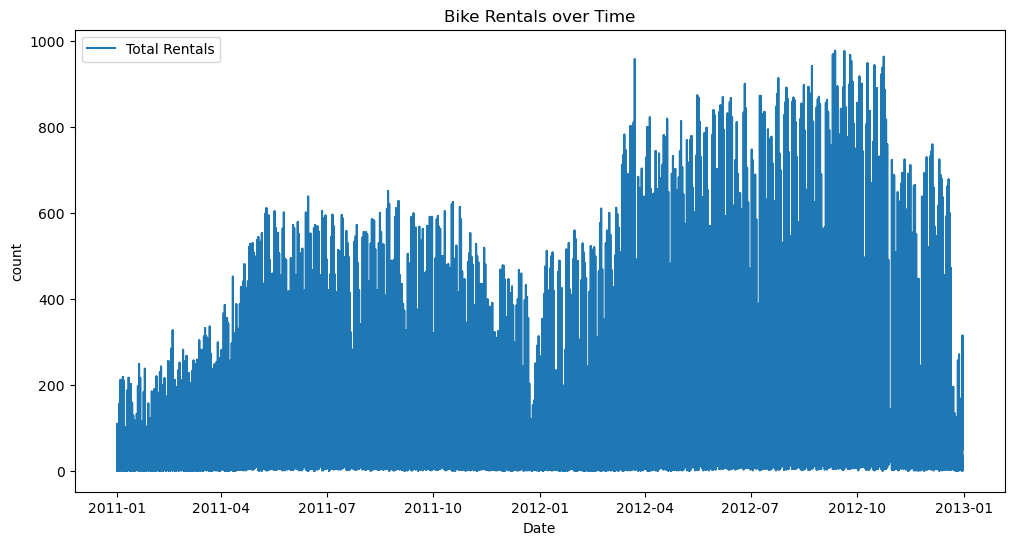

In [23]:
plt.figure(figsize=(12,6))
plt.plot(bk_dt['Date'], bk_dt['count'], label = 'Total Rentals')
plt.title('Bike Rentals over Time')
plt.xlabel('Date')
plt.ylabel('count')
plt.legend()
plt.show()

### **Bike rentals by hour**

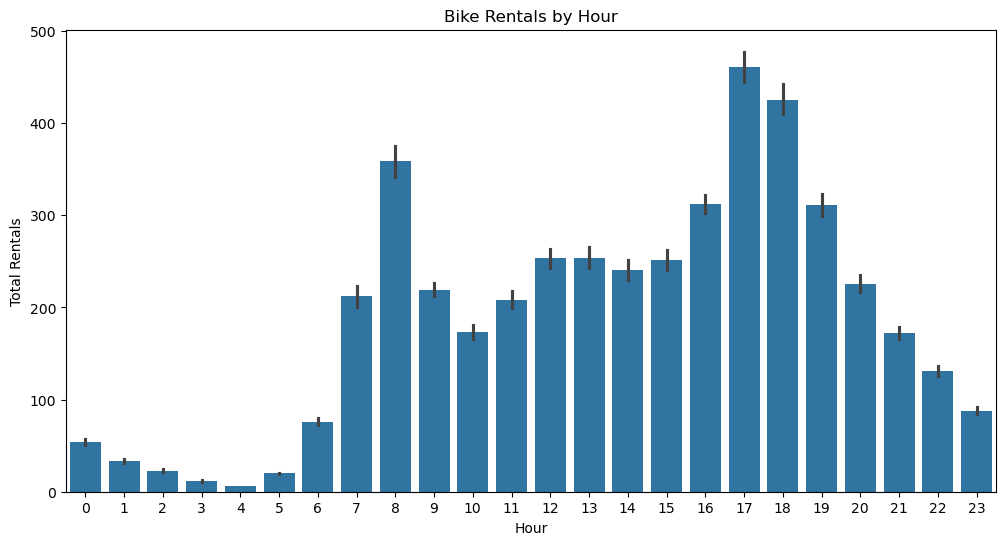

In [31]:
plt.figure(figsize=(12, 6))
sns.barplot(x='hour', y='count', data=bk_dt)
plt.title('Bike Rentals by Hour')
plt.xlabel('Hour')
plt.ylabel('Total Rentals')
plt.show()


### **Bike rentals by season**

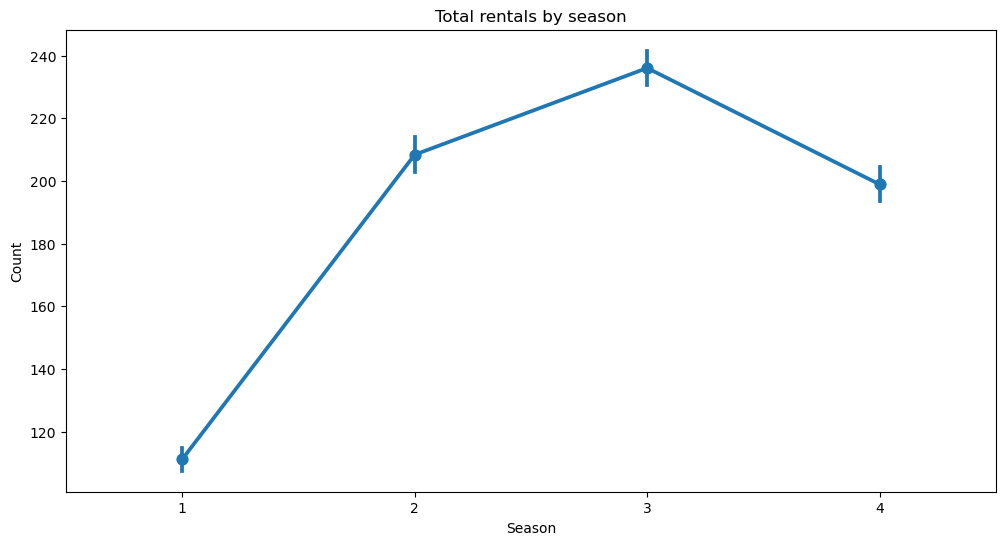

In [37]:
plt.figure(figsize = (12,6))
sns.pointplot(x = 'season', y = 'count', data = bk_dt)
plt.title('Total rentals by season')
plt.xlabel('Season')
plt.ylabel('Count')
plt.show()

### **Correlation Matrix**

<Axes: >

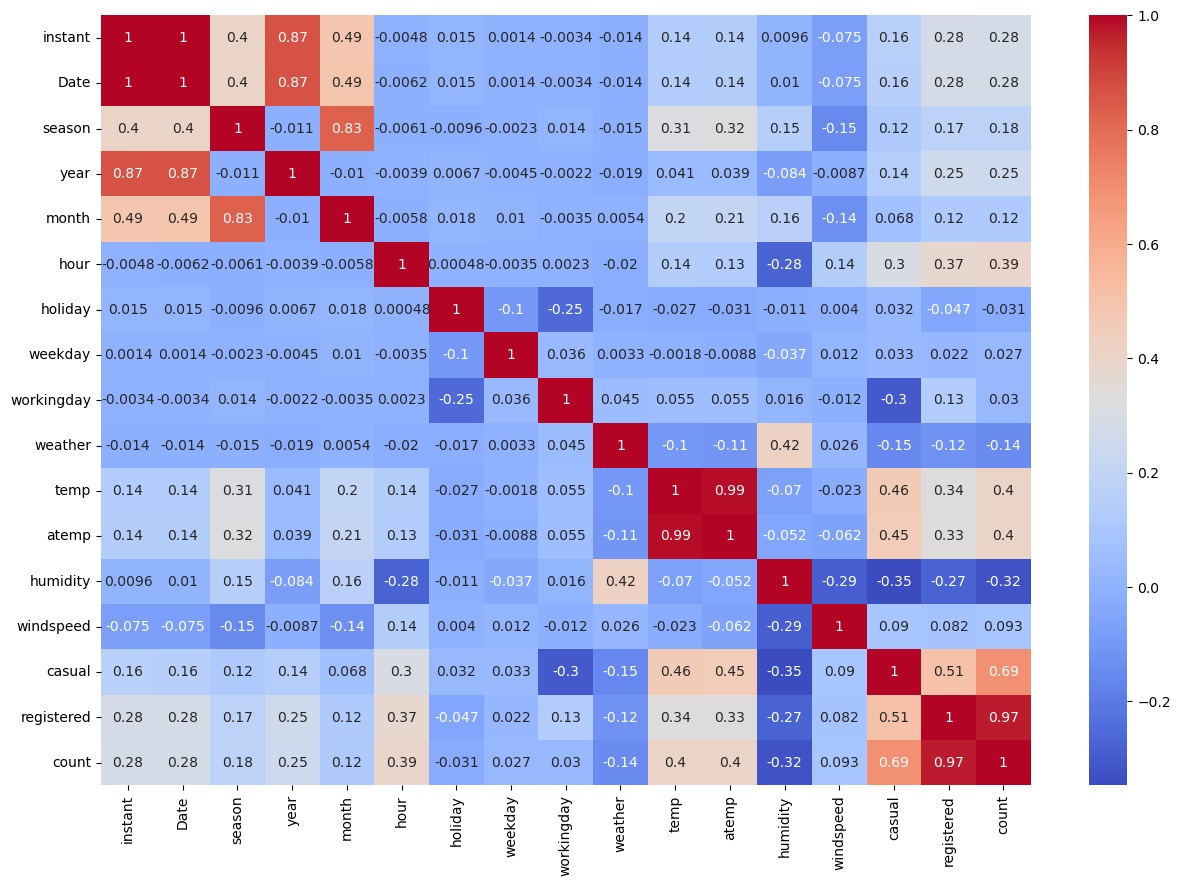

In [47]:
plt.figure(figsize = (15,10))
sns.heatmap(bk_dt.corr(), annot = True, cmap = 'coolwarm')

bk_dt.info()

## **Feature Engineering: Convert categorical variables into dummies**

In [49]:
bk_dt = pd.get_dummies(bk_dt, columns=['season', 'month', 'hour', 'holiday', 'weekday', 'workingday', 'weather'], drop_first=True)

In [50]:
bk_dt.head()

,instant,Date,year,temp,atemp,humidity,windspeed,casual,registered,count,...,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,workingday_1,weather_2,weather_3,weather_4
0,1,2011-01-01,0,0.24,0.2879,0.81,0.0,3,13,16,...,False,False,False,False,False,True,False,False,False,False
1,2,2011-01-01,0,0.22,0.2727,0.80,0.0,8,32,40,...,False,False,False,False,False,True,False,False,False,False
2,3,2011-01-01,0,0.22,0.2727,0.80,0.0,5,27,32,...,False,False,False,False,False,True,False,False,False,False
3,4,2011-01-01,0,0.24,0.2879,0.75,0.0,3,10,13,...,False,False,False,False,False,True,False,False,False,False
4,5,2011-01-01,0,0.24,0.2879,0.75,0.0,0,1,1,...,False,False,False,False,False,True,False,False,False,False


## **Prepare data for modeling**

In [52]:
X = bk_dt.drop(columns = ['Date', 'instant', 'casual', 'registered', 'count'])
y = bk_dt['count']

## **Split the data into training and testing sets**

In [55]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [58]:
#Initialize the models

models = {
    'Linear Regression' : LinearRegression(),
    'Decision Tree Regressor' : DecisionTreeRegressor(random_state = 42),
    'Random Forest' : RandomForestRegressor(random_state = 42),
    'Gradient Boosting' : GradientBoostingRegressor(random_state = 42),
    'Support Vector' : SVR()
}

In [72]:
#Function to evaluate model 

def evaluate_model(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)

    return mae, mse, rmse, r2, y_pred


In [77]:
# Dictionary to store model performance
model_performance = {}
predictions = {}

# Evaluate all models
for name, model in models.items():
    mae, mse, rmse, r2, y_pred = evaluate_model(model, X_train, y_train, X_test, y_test)
    model_performance[name] = {'MAE': mae, 'MSE': mse, 'RMSE': rmse, 'R2': r2}
    predictions[name] = model.predict(X_test)

In [ ]:
# Display model performance in a table
performance_df = pd.DataFrame(model_performance).T
performance_df

# **Visualize predictions vs actual values of all 5 models**

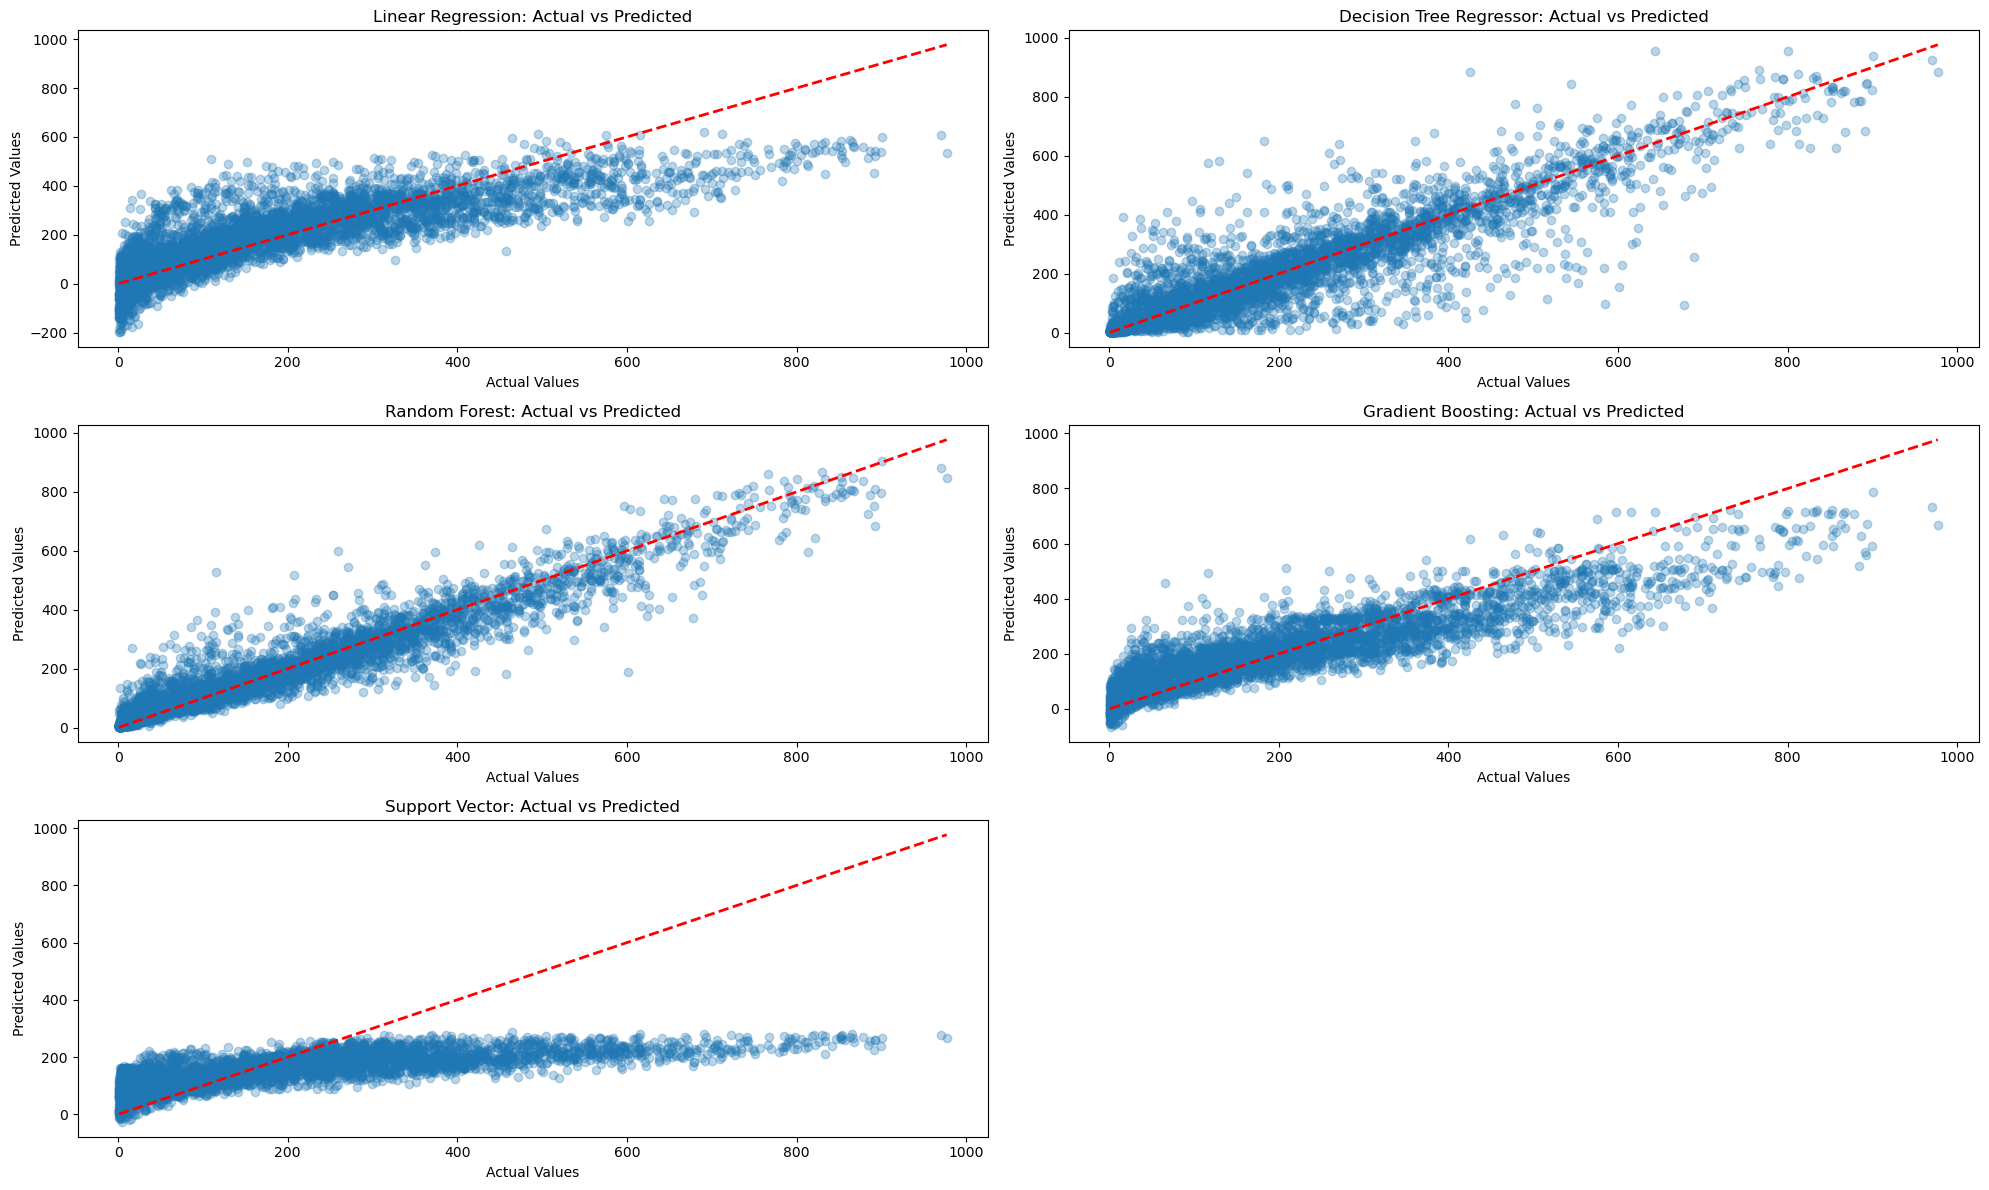

In [81]:
# Visualize predictions vs actual values
plt.figure(figsize=(20, 12))
for i, (name, preds) in enumerate(predictions.items(), 1):
    plt.subplot(3, 2, i)
    plt.scatter(y_test, preds, alpha=0.3)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r', linewidth=2)
    plt.title(f'{name}: Actual vs Predicted')
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
plt.tight_layout()
plt.show()

from above graphs **Random Forest** is best model

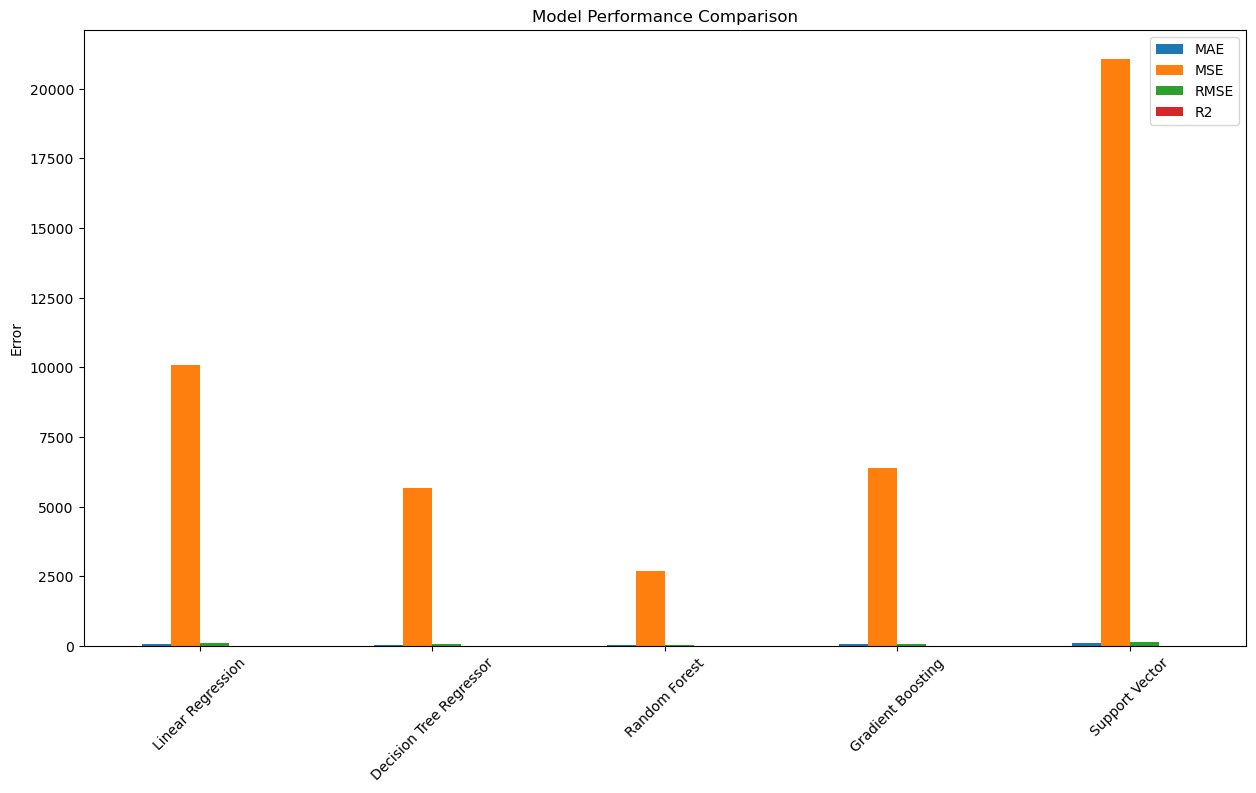

In [82]:
# Visualize model performance
performance_df.plot(kind='bar', figsize=(15, 8))
plt.title('Model Performance Comparison')
plt.ylabel('Error')
plt.xticks(rotation=45)
plt.show()

In [87]:
# Conclusion: Displaying the best performing model and its metrics
best_model = performance_df.sort_values(by='R2', ascending=False).iloc[0]
print("\nBest Performing Model:\n", best_model)


Best Performing Model:
 MAE       33.311837
MSE     2678.769805
RMSE      51.756833
R2         0.915204
Name: Random Forest, dtype: float64


## **Hyperparameter Tuning (Random Forest) GridSearchCV**

In [ ]:
# Hyperparameter Tuning (Example: Random Forest)
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

rf_model = RandomForestRegressor(random_state=42)
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

In [84]:
# Best hyperparameters
print("Best Parameters:", grid_search.best_params_)

Best Parameters: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 300}


In [88]:

best_rf_model = grid_search.best_estimator_
mae, mse, rmse, r2, _ = evaluate_model(best_rf_model, X_train, y_train, X_test, y_test)
print(f"Random Forest - Tuned Model: MAE={mae}, MSE={mse}, RMSE={rmse}, R2={r2}")

Random Forest - Tuned Model: MAE=33.166340327628305, MSE=2649.6770998796947, RMSE=51.4750143261728, R2=0.9161251478072829
